# Introduction to Bayesian Linear Regression

* The goal of Bayesian Linear Regression is to ascertain(making sure of) the prior probability for the model parameters rather than to identify the one **best** value of the model parameters.


* We formulate linear regression using probability distributions rather than point estimates.


* The response,y, is not estimated as a single value, but it is assumed to be drawn from a probability distribution.


* The model for Bayesian Linear Regression with the response sampled from a normal distribution is:
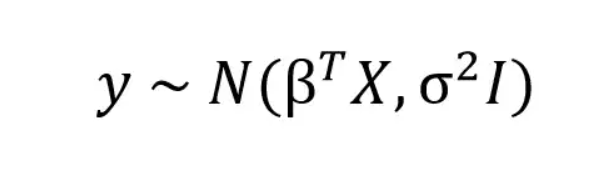


* The output, y is generated from a normal(Gaussian Distribution) characterized by a mean and variance.


* The mean for the linear regression is the transpose of weight matrix multiplied by the predictor matrix.


* The variance is the square of the standard deviation sigma (multiplied by the identity matrix because this is a multi-dimensional formulation of the model).


* Not only is the response generated from a probability distribution, but the model parameters are assumed to come from a distribution as well.


* The posterior probability of the model parameter is conditional upon the training inputs and outputs:
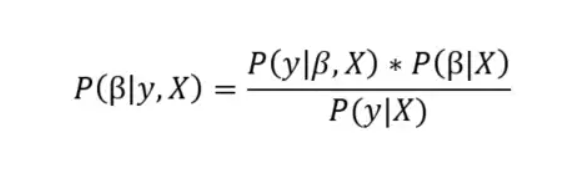


* P(β|y, X) is the posterior probability distribution of the model parameters given the inputs and the outputs.


* This is equal to the likelihood of the data, P(y|β, X), multiplied by the prior probability of the parameters and divided by a normalization constant.


* This is a simple expression of Bayes Theorem, the fundamental underpinning of Bayesian Inference:
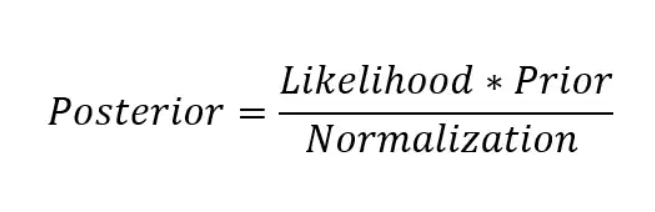


* In contrast to OLS(Ordinary Least Squares), we have a posterior distribution for the model parameters that is proportional to the likelihood of the data multiplied by the prior probability of the parameters.


* As the amount of data points increases, the likelihood washes out prior, and in the case of infinite data, the outputs for the parameters converge to the values obtianed from Ordinary Least Sqaures.

* Bayesian Linear Regression is a very powerful method because they provide us with the entire distribution over regression parameters.


* In order to calculate inadequate data or unequal distributed data, Bayesian Linear Regression provides a natural mechanism.


* Statistical analysis is conducted under the conditions of Bayesian interface in Bayesian linear regression in statistics.

Advantages of Bayesian Linear Regression:
* With the help of Bayesian processing, we can retrieve the complete variety of inferential solutions instead of a point estimate.


* It works efficiently with the small size of the dataset.


* It is very suitable for the online form of learning, whereas, in the form of batch learning, we have the whole dataset.


* It is a very powerful and tested approach.

Disadvantages of Bayesian Linear Regression:
* It does not work efficiently if the dataset contains a huge amount of data.


* The conjecture of the model can be time-consuming.

* **scipy.stats.percentileofscore** - computes the percentile rank of a score relative to a list of scores. A **percentileofscore** of, for example, 80% means that 80% of the scores in **a** are below the given score.  

* **sklearn.linear_model.ElasticNet** - In the fitting of linear or logistic regression models, the elastic net is a regularized regression method that linearly combines  the L1(Manhattan geometry or taxicab geometry) and L2(Euclidean norm) penalties of the lasso(least absolute shrinkage and selection operator) and ridge methods.


* LASSO is a regression analysis method that performs both feature selection(variable selection) and regularization in order to enhance the accuracy and interpretability of the resulting statistic model.


* Ridge regression(Tikonov regularization) is a method of estimating the coefficients of multiple-regression models in scenarios where the independent variables are highly correlated.

* Ensemble means a group of elements viewed as a whole rather than individually. An ensemble method creates multiple models and combines them to solve it. Ensemble methods help to improve the robustness/generalizability of the model. 


* **ExtraTreesRegressor** is a powerful alternative to random forest ensemble approach. It is a type of ensemble learning technique that aggregates the results different de-correlated decision trees similar to Random Forest Classifier. ExtraTree can often achieve a good or better performance than the Random Forest.


* The differences between ExtraTreeClassifier and Random Forest are:
1. Extra Tree Classifier does not perform bootstrap aggregation like in the random forest. In simple words, takes a random subset of data without replacement. Thus nodes are split on random splits and not on best splits.


2. So in Extra Tree Classifier randomness doesn’t come from bootstrap aggregating but comes from the random splits of the data.


* ExtraTree is used when accuracy is more important than a generalized model which gives us a low variance and it also give feature importance.


* **sklearn.ensemble.ExtraTreesRegressor** - An extra-trees regressor. This class implements a meta estimator that fits a number of randomized decision trees ( extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.


* GradientBoostingRegressor - This estimator builds an additive model(a nonparametric regression model) in a forward stage-wise fashion; it allows for the optimization of arbitary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

* Median absolute error(Median absolute deviation) - The loss is calculated by taking the median of all absolute differences between the target and the prediction. It is robust to outliers.

* **pymc3** is a python package for Bayesian statistical modeling and Probabilistic Machine Learning focusing on advanced Markov chain Monte Carlo (MCMC) and variational inference (VI) algorithms. Its flexibility and extensibility make it applicable to a large suite of problems.

# Importing the necessary libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
from scipy.stats import percentileofscore
from scipy import stats
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
import scipy
import pymc3 as pm

In [43]:
%matplotlib inline

In [44]:
np.random.seed(42)

In [45]:
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (9,9)

# Importing the dataset

In [46]:

data = pd.read_csv("D:\\SLIIT\\3rd year 2nd sem\\Machine Learning amd Optimization Methods\\Coding\\student-mat1.csv")

#Filter out grades that were 0
data = data[~data['G3'].isin([0,1])]
data = data.rename(columns={'G3':'Grade'})
data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


# Exploring the dataset

In [47]:
#Exploring the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,357.0,16.655462,1.268262,15.0,16.0,17.0,18.0,22.0
Medu,357.0,2.795518,1.093999,0.0,2.0,3.0,4.0,4.0
Fedu,357.0,2.546218,1.084217,0.0,2.0,3.0,3.0,4.0
traveltime,357.0,1.431373,0.686075,1.0,1.0,1.0,2.0,4.0
studytime,357.0,2.042017,0.831895,1.0,1.0,2.0,2.0,4.0
failures,357.0,0.271709,0.671750,0.0,0.0,0.0,0.0,3.0
famrel,357.0,3.955182,0.885721,1.0,4.0,4.0,5.0,5.0
freetime,357.0,3.246499,1.011601,1.0,3.0,3.0,4.0,5.0
goout,357.0,3.098039,1.090779,1.0,2.0,3.0,4.0,5.0
Dalc,357.0,1.495798,0.919886,1.0,1.0,1.0,2.0,5.0


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      357 non-null    object
 1   sex         357 non-null    object
 2   age         357 non-null    int64 
 3   address     357 non-null    object
 4   famsize     357 non-null    object
 5   Pstatus     357 non-null    object
 6   Medu        357 non-null    int64 
 7   Fedu        357 non-null    int64 
 8   Mjob        357 non-null    object
 9   Fjob        357 non-null    object
 10  reason      357 non-null    object
 11  guardian    357 non-null    object
 12  traveltime  357 non-null    int64 
 13  studytime   357 non-null    int64 
 14  failures    357 non-null    int64 
 15  schoolsup   357 non-null    object
 16  famsup      357 non-null    object
 17  paid        357 non-null    object
 18  activities  357 non-null    object
 19  nursery     357 non-null    object
 20  higher    

In [49]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
Grade         0
dtype: int64

In [50]:
data.shape

(357, 33)

# Value counts for categorical columns

In [51]:
#Printing value counts for categorical columns
for col in data.columns:
    if data[col].dtype == 'object':
        print('\nColumn Name:',col)
        print(data[col].value_counts())


Column Name: school
GP    315
MS     42
Name: school, dtype: int64

Column Name: sex
F    185
M    172
Name: sex, dtype: int64

Column Name: address
U    279
R     78
Name: address, dtype: int64

Column Name: famsize
GT3    250
LE3    107
Name: famsize, dtype: int64

Column Name: Pstatus
T    318
A     39
Name: Pstatus, dtype: int64

Column Name: Mjob
other       127
services     94
teacher      54
at_home      50
health       32
Name: Mjob, dtype: int64

Column Name: Fjob
other       196
services    100
teacher      26
health       18
at_home      17
Name: Fjob, dtype: int64

Column Name: reason
course        126
reputation     99
home           97
other          35
Name: reason, dtype: int64

Column Name: guardian
mother    248
father     82
other      27
Name: guardian, dtype: int64

Column Name: schoolsup
no     307
yes     50
Name: schoolsup, dtype: int64

Column Name: famsup
yes    219
no     138
Name: famsup, dtype: int64

Column Name: paid
no     184
yes    173
Name: paid, dty

# Distribution of the grades

In [52]:
data['Grade'].describe()

count    357.000000
mean      11.523810
std        3.227797
min        4.000000
25%        9.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: Grade, dtype: float64

In [53]:
data['Grade'].value_counts()

10    56
11    47
15    33
8     32
13    31
12    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
20     1
4      1
Name: Grade, dtype: int64

([<matplotlib.axis.XTick at 0x1f5b6a67b50>,
 [Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19')])

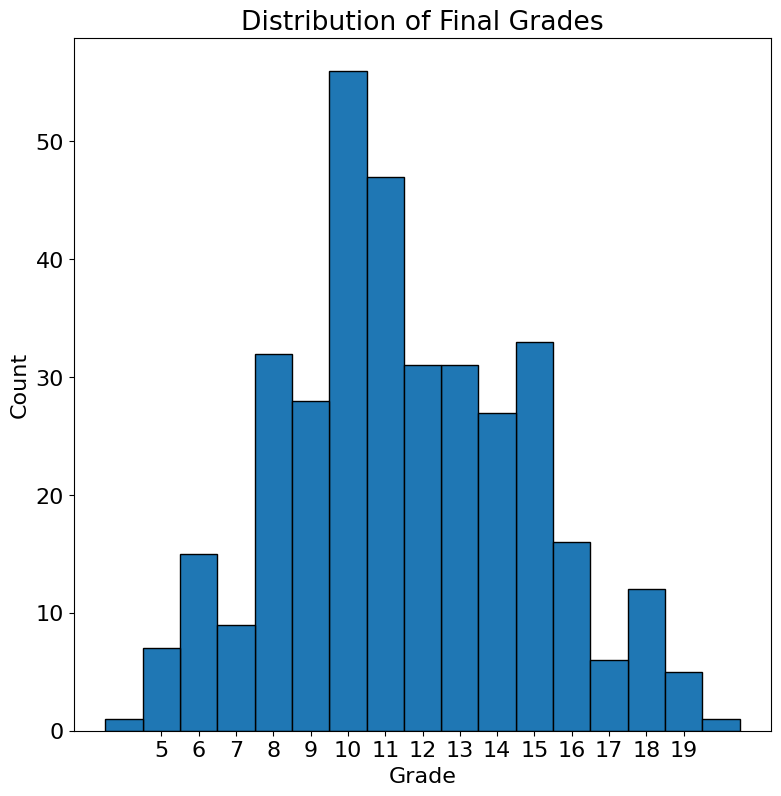

In [13]:
#Plotting the bar plots of the grades
plt.bar(data['Grade'].value_counts().index, data['Grade'].value_counts().values,fill='navy',edgecolor='k',width=1)
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Distribution of Final Grades')
plt.xticks(list(range(5,20)))

## Grade distribution by different categorical variables

* **seaborn.kdeplot** - Plot univariate or bivariate distributions using kernel density estimation. A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.


* **data.ix parameter** - ix[] supports mixed integer and label based access. It is primarily label based, but will fall back to integer positional access unless the corresponding axis is of integer type. 


* **shade parameter** - We can highlight the plot using shade to the area covered by the curve. Same as the **fill** parameter.

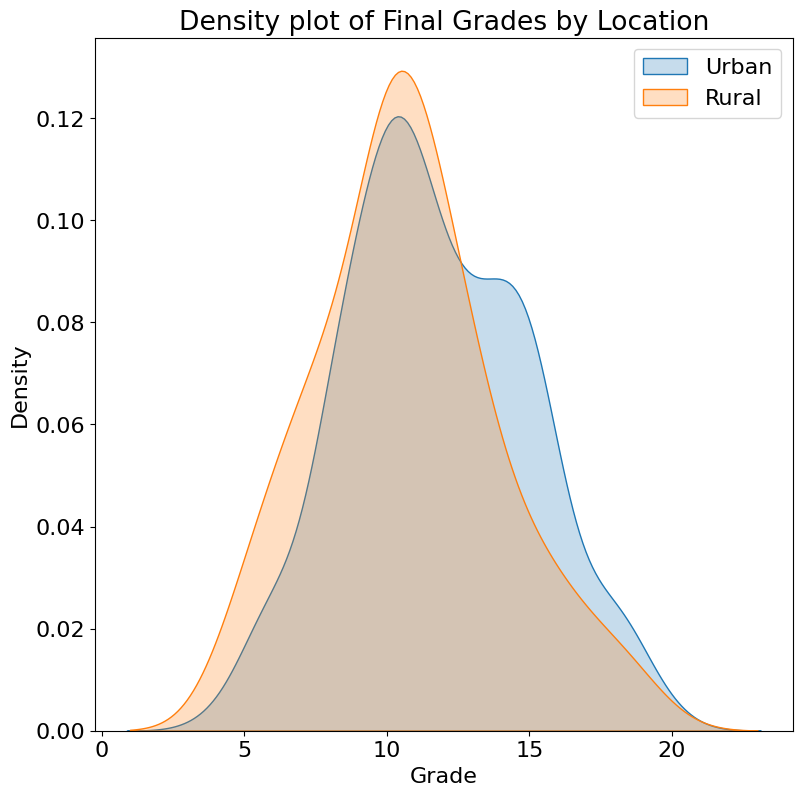

In [54]:
#Grade distribution by address
sns.kdeplot(data.loc[data['address'] == 'U','Grade'],label='Urban',fill=True)
sns.kdeplot(data.loc[data['address'] == 'R','Grade'],label='Rural',fill=True)
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Density plot of Final Grades by Location')
plt.legend()

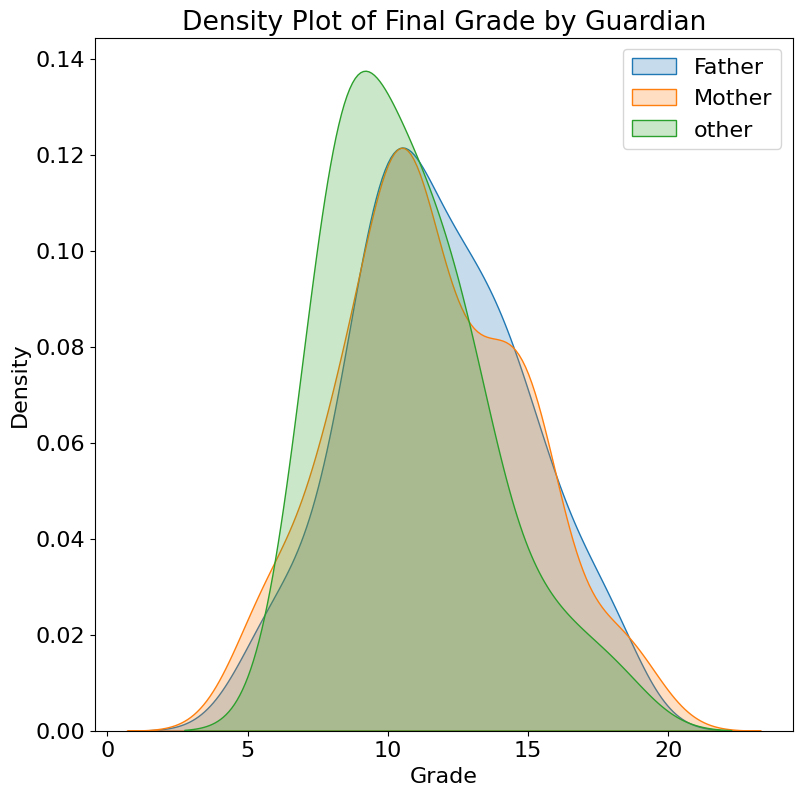

In [15]:
#Grade distribution by guardian
sns.kdeplot(data.loc[data['guardian'] == 'father','Grade'],label='Father',fill=True)
sns.kdeplot(data.loc[data['guardian'] == 'mother','Grade'],label='Mother',fill=True)
sns.kdeplot(data.loc[data['guardian'] == 'other','Grade'],label='other',fill=True)
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Density Plot of Final Grade by Guardian')
plt.legend()

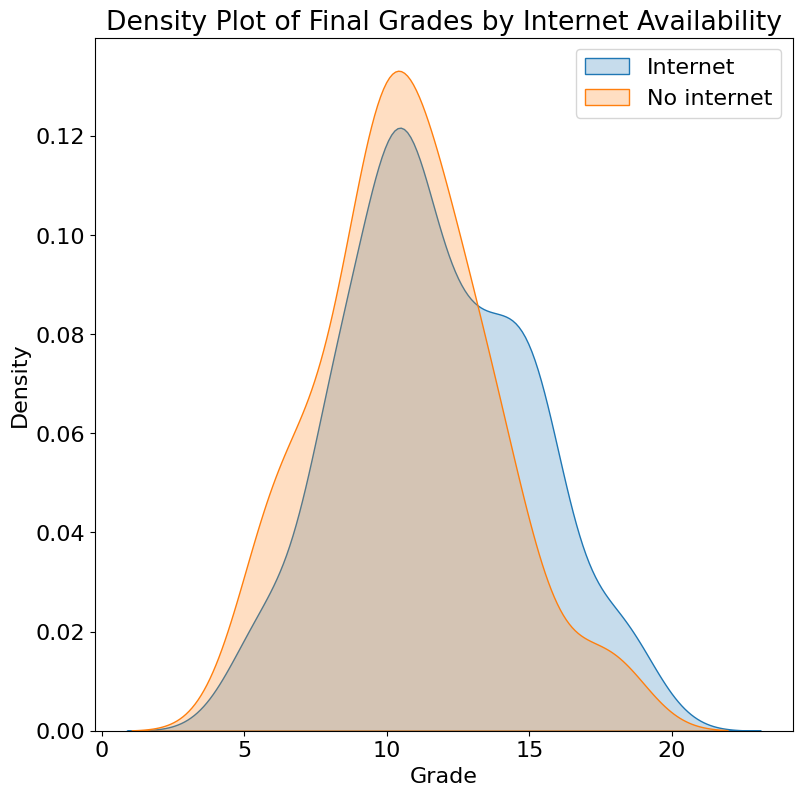

In [55]:
#Grade distribution by internet
sns.kdeplot(data.loc[data['internet'] == 'yes','Grade'],label='Internet',fill=True)
sns.kdeplot(data.loc[data['internet'] == 'no','Grade'],label='No internet',fill=True)
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Density Plot of Final Grades by Internet Availability')
plt.legend()

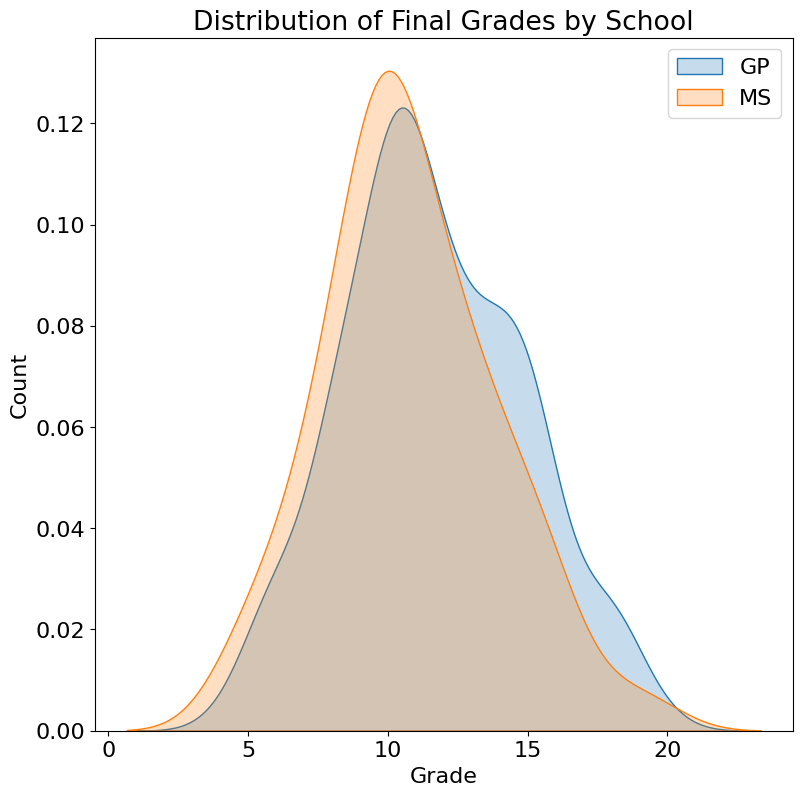

In [56]:
#Grade distribution by school
sns.kdeplot(data.loc[data['school'] == 'GP','Grade'],label='GP',fill=True)
sns.kdeplot(data.loc[data['school'] == 'MS','Grade'],label='MS',fill=True)
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Distribution of Final Grades by School')
plt.legend()

In [57]:
#Printing the distribution of schools by address
schools = data.groupby(['school'])['address'].value_counts()
schools

school  address
GP      U          259
        R           56
MS      R           22
        U           20
Name: address, dtype: int64

## Grade Percentiles

In [58]:
#Calculate percentiles for grades
data['percentile'] = data['Grade'].apply(lambda x: percentileofscore(data['Grade'],x))
data['percentile']

0       4.481793
1       4.481793
2      33.753501
3      84.313725
4      33.753501
         ...    
390    21.988796
391    91.176471
392     7.843137
393    33.753501
394    21.988796
Name: percentile, Length: 357, dtype: float64

Text(0.5, 1.0, 'Grade Percentiles')

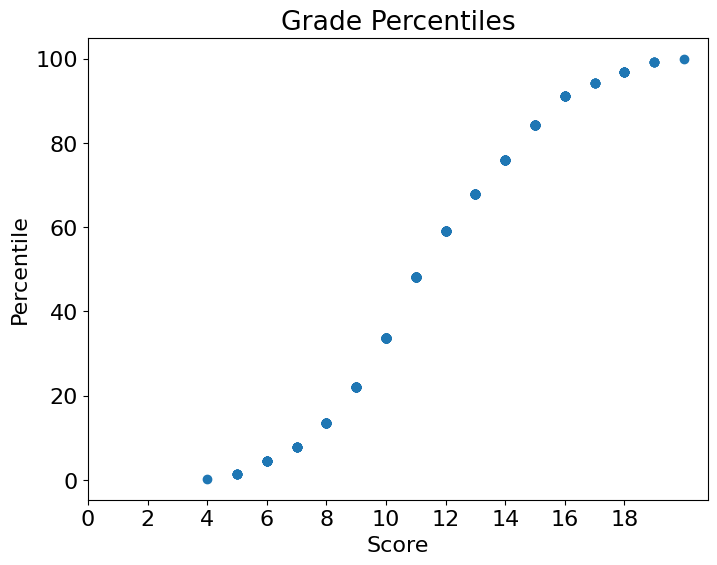

In [59]:
#Plotting the percentiles for grades
plt.figure(figsize=(8,6))
plt.plot(data['Grade'],data['percentile'],'o')
plt.xticks(range(0,20,2),range(0,20,2))
plt.xlabel('Score')
plt.ylabel('Percentile')
plt.title('Grade Percentiles')

In [60]:
print('50th percentile score:',np.min(data.loc[data['percentile'] > 50, 'Grade']))
print('Minimum score needed for 90th percentile:',np.min(data.loc[data['percentile'] > 90,'Grade']))

50th percentile score: 12
Minimum score needed for 90th percentile: 16


# Variable correlations with Final Grade

## Numerical Correlations

In [61]:
#Correlation of numerical values
data.corr()['Grade'].sort_values()

C:\Users\binur\AppData\Local\Temp\ipykernel_4000\3729091079.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Grade'].sort_values()


failures     -0.293831
absences     -0.213129
Walc         -0.190054
goout        -0.177383
Dalc         -0.140690
age          -0.140372
traveltime   -0.099785
health       -0.081691
freetime     -0.021589
famrel        0.037711
studytime     0.126728
Fedu          0.158811
Medu          0.190308
G1            0.891805
G2            0.965583
percentile    0.983823
Grade         1.000000
Name: Grade, dtype: float64

## Categorical Correlations using One Hot Encoding

In [62]:
#Selecting only the categorical variables
categorical = data.select_dtypes('object')
categorical

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,services,services,course,other,no,yes,yes,no,yes,yes,no,no
391,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no
392,MS,M,R,GT3,T,other,other,course,other,no,no,no,no,no,yes,no,no
393,MS,M,R,LE3,T,services,other,course,mother,no,no,no,no,no,yes,yes,no


In [63]:
#One hot encoding the variables
dummy = pd.get_dummies(categorical)
dummy

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,1,0,1,0,0,1,1,0,1,0,...,1,0,0,1,0,1,1,0,1,0
1,1,0,1,0,0,1,1,0,0,1,...,1,0,1,0,0,1,0,1,1,0
2,1,0,1,0,0,1,0,1,0,1,...,1,0,0,1,0,1,0,1,1,0
3,1,0,1,0,0,1,1,0,0,1,...,0,1,0,1,0,1,0,1,0,1
4,1,0,1,0,0,1,1,0,0,1,...,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,1,0,1,0,1,0,1,1,0,...,1,0,0,1,0,1,1,0,1,0
391,0,1,0,1,0,1,0,1,0,1,...,1,0,1,0,0,1,0,1,1,0
392,0,1,0,1,1,0,1,0,0,1,...,1,0,1,0,0,1,1,0,1,0
393,0,1,0,1,1,0,0,1,0,1,...,1,0,1,0,0,1,0,1,1,0


In [64]:
#Putting the grade back in the dataframe
dummy['Grade'] = data['Grade']

In [65]:
#Correlations of the newly transformed categorical variables
dummy.corr()['Grade'].sort_values()

schoolsup_yes       -0.238365
Mjob_other          -0.142541
address_R           -0.130090
higher_no           -0.113419
internet_no         -0.111624
sex_F               -0.102448
Mjob_at_home        -0.090624
school_MS           -0.083615
Fjob_other          -0.081502
guardian_other      -0.069491
famsup_yes          -0.067305
activities_no       -0.058600
reason_course       -0.050918
romantic_yes        -0.049944
famsize_GT3         -0.039744
paid_yes            -0.028899
Pstatus_T           -0.026665
nursery_no          -0.026541
Fjob_services       -0.018154
reason_other        -0.003897
reason_home          0.000372
Fjob_health          0.006241
guardian_mother      0.007728
nursery_yes          0.026541
Pstatus_A            0.026665
paid_no              0.028899
Fjob_at_home         0.028954
guardian_father      0.035220
famsize_LE3          0.039744
Mjob_teacher         0.045390
romantic_no          0.049944
reason_reputation    0.056573
activities_yes       0.058600
famsup_no 

# Selecting the six most correlated variables with the final score

In [104]:
#This method takes in a dataframe, finds the most correlated variables with the grade and returns the training and testing datasets.

def format_data(data):
    #Targets are the final grades of the student
    labels = data['Grade']
    
    #Dropping the school and the grades from features
    data = data.drop(columns=['school','G1','G2','percentile'])
    
    #One hot-encoding of the categorical variables
    data1 = pd.get_dummies(data)
    
    #Finding the correlations with the grade
    most_correlated = data.corr().abs()['Grade'].sort_values(ascending=False)
    
    #Maintain the top 6 most correlated features with Grade
    most_correlated = most_correlated[:8]
    
   # data = data.loc[:,most_correlated.index]
    #data = data.drop(columns='higher_no')
    
    data = data1[['Grade','failures','higher_yes','Medu','studytime','Fedu','absences']]
    
    #Splitting the dataset into training and testing
    x_train,x_test,y_train,y_test = train_test_split(data,labels,test_size=0.25,random_state=42)
    
    return x_train,x_test,y_train,y_test

In [105]:
x_train,x_test,y_train,y_test = format_data(data)
x_train.head()

C:\Users\binur\AppData\Local\Temp\ipykernel_4000\1361506897.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  most_correlated = data.corr().abs()['Grade'].sort_values(ascending=False)


,Grade,failures,higher_yes,Medu,studytime,Fedu,absences
60,11,0,1,4,2,4,6
114,9,0,1,2,2,1,8
281,10,1,1,3,1,2,19
110,19,0,1,4,1,4,6
309,10,1,1,1,2,1,18


## Rename Variables

In [107]:
#Renaming variables in testing and training
x_train = x_train.rename(columns={'higher_yes': 'higher_edu', 
                                  'Medu': 'mother_edu',
                                  'Fedu': 'father_edu'})

x_test = x_test.rename(columns={'higher_yes': 'higher_edu', 
                                  'Medu': 'mother_edu',
                                  'Fedu': 'father_edu'})

In [108]:
x_train.head(10)

,Grade,failures,higher_edu,mother_edu,studytime,father_edu,absences
60,11,0,1,4,2,4,6
114,9,0,1,2,2,1,8
281,10,1,1,3,1,2,19
110,19,0,1,4,1,4,6
309,10,1,1,1,2,1,18
249,15,0,1,0,1,2,0
17,10,0,1,3,2,3,4
158,15,0,1,2,1,2,2
24,8,0,1,2,3,4,2
101,17,0,1,4,3,4,0


In [109]:
x_train.shape

(267, 7)

In [110]:
x_test.shape

(90, 7)

## Pair Plots of Selected Variables

* **scipy.stats.pearson** - Calculates the pearson correlation coefficient and p-value for testing non-correlation.


* **matplotlib.pyplot.gca** - Gets the current axes.


* In the **annotate** function: 
1. The **xy** parameter is the point (x,y) to annotate. The coordinate system is determined by xycoords.
2. The **xycoords** parameter defines the coordinate system that **xy** is given in.
3. In the **xycoords** parameter the attribute **transAxes** is used to transform axes from axes coords to display cords.

In [111]:
#Method to calculate the correlation coefficient
def corrfunc(x,y,**kws):
    r,_ = stats.pearsonr(x,y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),xy=(.1,.6),xycoords=ax.transAxes,size=24)

* **seaborn.subehelix_palette** - Make a sequential palette from the cubehelix system. This produces a colormap with linearly-decreasing (or increasing) brightness. That means that information will be preserved if printed to black and white or viewed by someone who is colorblind. “cubehelix” is also available as a matplotlib-based palette, but this function gives the user more control over the look of the palette and has a different set of defaults.


* The **hue** parameter is used to give the saturation of the colours.


* The **as_cmap** parameter return **matplotlib.colors.ListedColormap** if true.


* **cmap(colormap)**

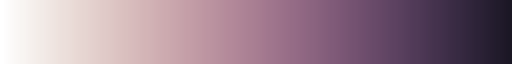

In [112]:
cmap = sns.cubehelix_palette(light=1,dark=0.1,hue=0.5,as_cmap=True)
cmap

* **seaborn.set_context** - Sets the parameters that control the scaling of plot elements.


* The **font_scale** parameter is a separate scaling factor to independently scale the size of the font elements.

In [113]:
sns.set_context(font_scale=2)

* **seaborn.PairCrid** is a subplot grid for plotting pairwise relationships in a dataset.


* **map_upper()** - Plot with a bivariate function on the upper diagonal subplots.


* Bivariate function is a function with two variables.


* **map_diag()** - Plot with a univariate function on each diagonal subplot.


* Univariate function has only one variable.


* **displot(distribution plot)**, depicts(represent by a drawing,painting, or other art form) the variation in the data distribution.


* **map_lower()** - Plot with a bivariate function on the lower diagonal subplots.

C:\Users\binur\anaconda3\envs\tfradeon\lib\site-packages\seaborn\axisgrid.py:1544: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=color, **plot_kwargs)
C:\Users\binur\anaconda3\envs\tfradeon\lib\site-packages\seaborn\axisgrid.py:1544: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x

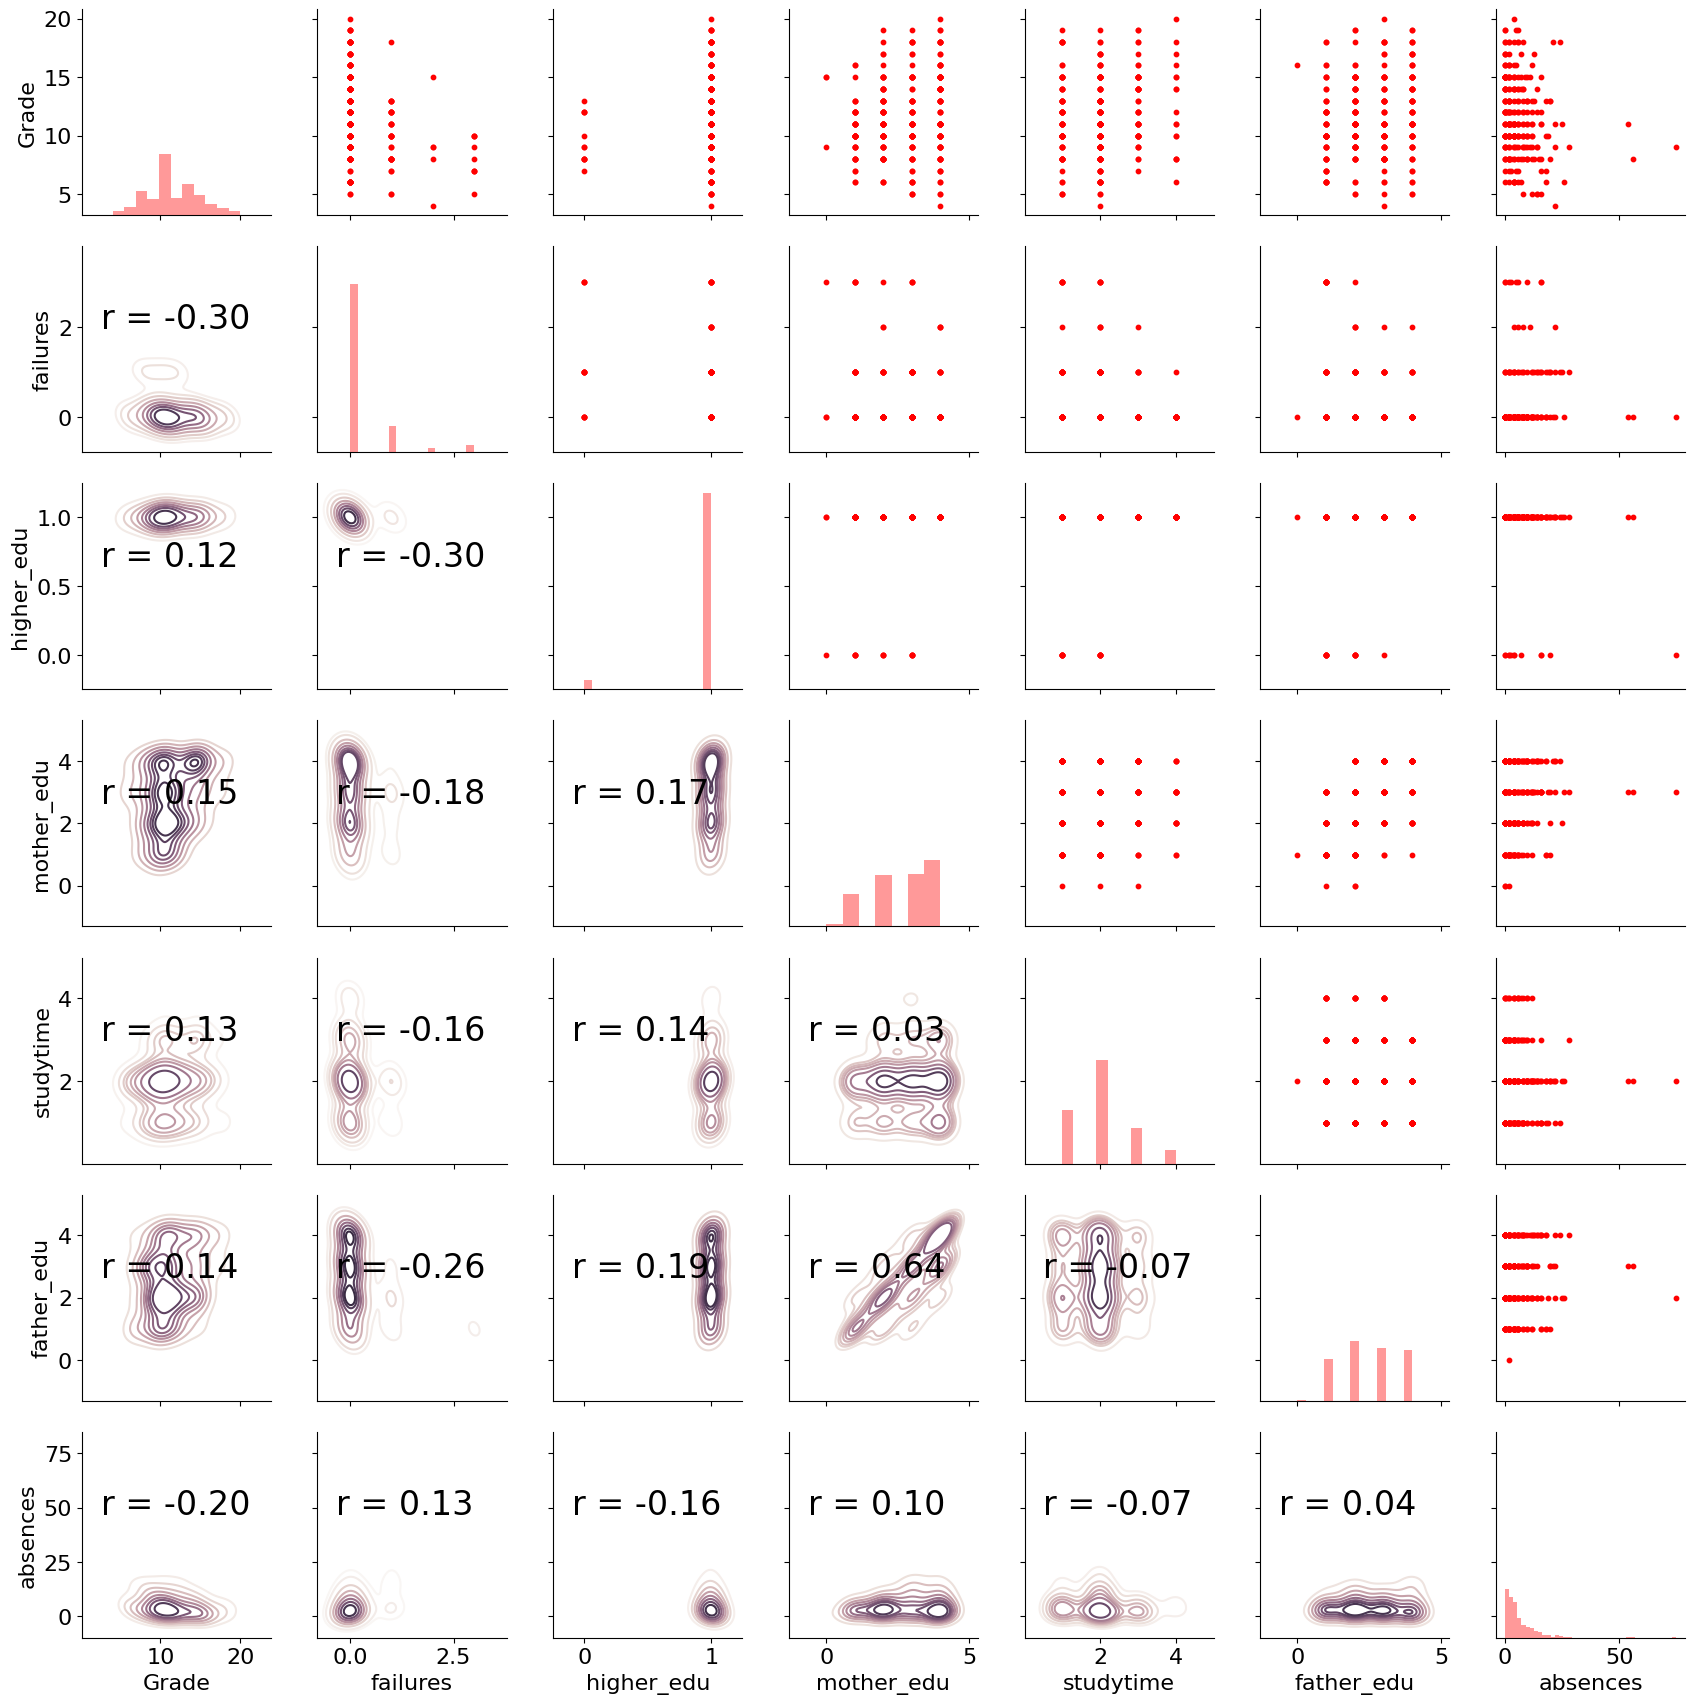

In [114]:
#Pair and set-up
g = sns.PairGrid(x_train)

#Scatterplot on the upper triangle
g.map_upper(plt.scatter,s=10,color='red')

#Distribution on the diagonal
g.map_diag(sns.distplot,kde=False,color='red')

#Density plot and correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot,cmap=cmap)
g.map_lower(corrfunc)

In [115]:
#Create relation to the median grade column
x_plot = x_train.copy()
x_plot['relation_median'] = (x_plot['Grade'] >= 12)
x_plot['relation_median'] = x_plot['relation_median'].replace({True:'above',False:'below'})
x_plot = x_plot.drop(columns='Grade')

## Selected Variables Distribution in Relation to Mean

* **matplotlib.pyplot.tight_layout()** - Adjust the padding between and around subplots.

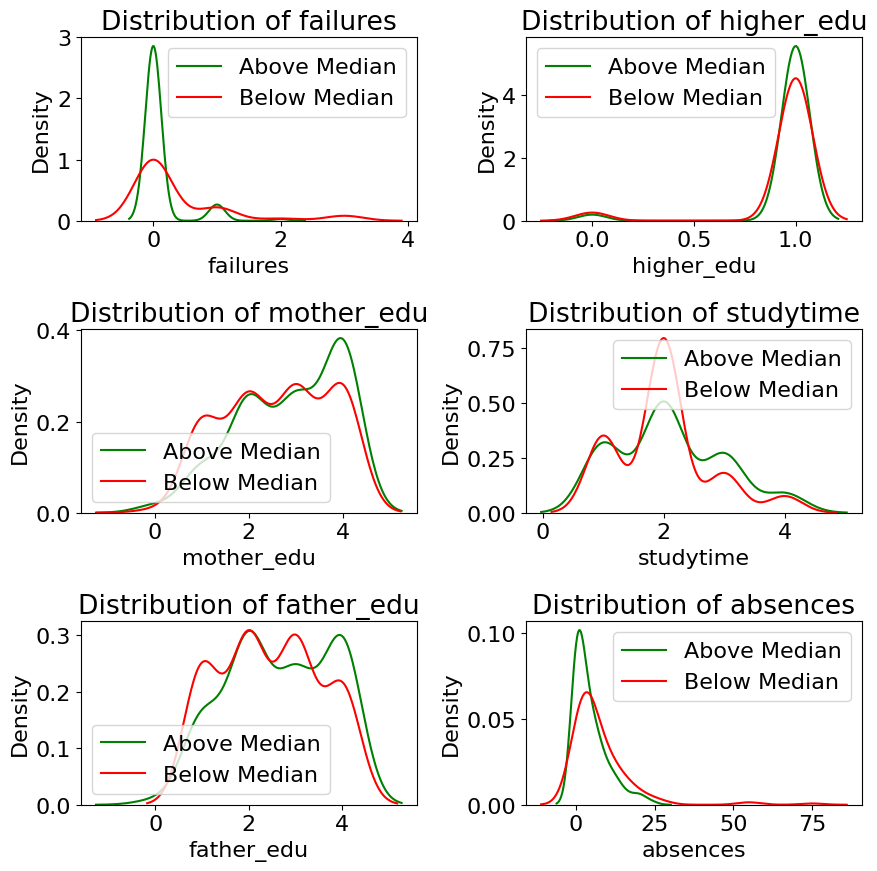

In [116]:
#Plotting the distribution of each variable colored by the relation to the median grade
for i,col in enumerate(x_plot.columns[:-1]):
    plt.subplot(3,2,i+1)
    subset_above = x_plot[x_plot['relation_median'] == 'above']
    subset_below = x_plot[x_plot['relation_median'] == 'below']
    sns.kdeplot(subset_above[col],label='Above Median',color='green')
    sns.kdeplot(subset_below[col],label='Below Median',color='red')
    plt.legend()
    plt.title('Distribution of %s' % col)
    
plt.tight_layout()

# Establish Benchmarks

## Metrics

In [117]:
#Calculating mse and rmse
def evaluate_predictions(predictions,true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean(abs(predictions - true) **2))
    
    return mae,rmse

## Naive Baseline

* For a regression task, a simple naive baseline is to guess the median value on the training set for all testing cases.

In [118]:
#Naive baseline is the mdedian
median_pred = x_train['Grade'].median()
median_preds = [median_pred for _ in range(len(x_test))]
true = x_test['Grade']

* **format()** - The format() method formats the specified value(s) and insert them inside the string's placeholder.The placeholder is defined using curly brackets.

In [ ]:
#Displaying the naive baseline metrics
mb_mae, mb_rmse = evaluate_predictions(median_preds,true)
print('Median Baseline MAE:'{:.4f}.format(mb_mae))
print('Median Baseline RMSE:'{:.4f}.format(mb_rmse))

## Standard Machine Learning models

* **sklearn.linear_models.ElasticNet**
1. **alpha** parameter - Constant that multiplies the penalty terms. Defaults to 1.0. See the notes for the exact mathematical meaning of this parameter. **alpha = 0** is equivalent to an **ordinary least square**, solved by the **LinearRegression** object. For numerical reasons, using **alpha = 0** with the **Lasso** object is not advised.

2. **l1_ratio** - The ElasticNet mixing parameter, with 0 <= l1_ratio <= 1. For l1_ratio = 0 the penalty is an L2 penalty. For l1_ratio = 1 it is an L1 penalty. For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2.


* **sklearn.svm.SVR**
1. **degree** - Degree of the polynomial kernel function (‘poly’). Must be non-negative. Ignored by all other kernels.
2. **gamma** - Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. If gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma. If ‘auto’, uses 1 / n_features.If float, must be non-negative.

In [125]:
#Evaluating several ML models by training them using the training data and testing data
def evaluate(x_train,x_test,y_train,y_test):
    #Names of the models
    model_name_list = ['Linear Regression','ElasticNet Regression','Random Forest','Extra Trees','SVR','Gradient Boosted','Baseline']
    x_train = x_train.drop(columns='Grade')
    x_test = x_test.drop(columns='Grade')
    
    #Instantiating the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0,l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=50)
    model4 = ExtraTreesRegressor(n_estimators=50)
    model5 = SVR(kernel='rbf',degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=20)
    
    #Dataframe for results
    results = pd.DataFrame(columns=['mae','rmse'],index=model_name_list)
    
    #Training and predicting with each model
    for i, model in enumerate([model1,model2,model3,model4,model5,model6]):
        model.fit(x_train,y_train)
        predictions = model.predict(x_test)
        
        #Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean(predictions-y_test) **2)
        
        #Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name,:] = [mae,rmse]
        
    #Median value baseline metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) **2))
    
    results.loc['Baseline', :] = [baseline_mae, baseline_rmse]
    
    return results

In [126]:
results = evaluate(x_train,x_test,y_train,y_test)
results

,mae,rmse
Linear Regression,2.33918,0.059299
ElasticNet Regression,2.484767,0.004774
Random Forest,2.520373,0.091424
Extra Trees,3.015478,0.500226
SVR,2.389627,0.24327
Gradient Boosted,2.351862,0.037896
Baseline,2.555556,3.148192


## Visual comparisons of models

In [127]:
figsize(12,8)
matplotlib.rcParams['font.size'] = 16

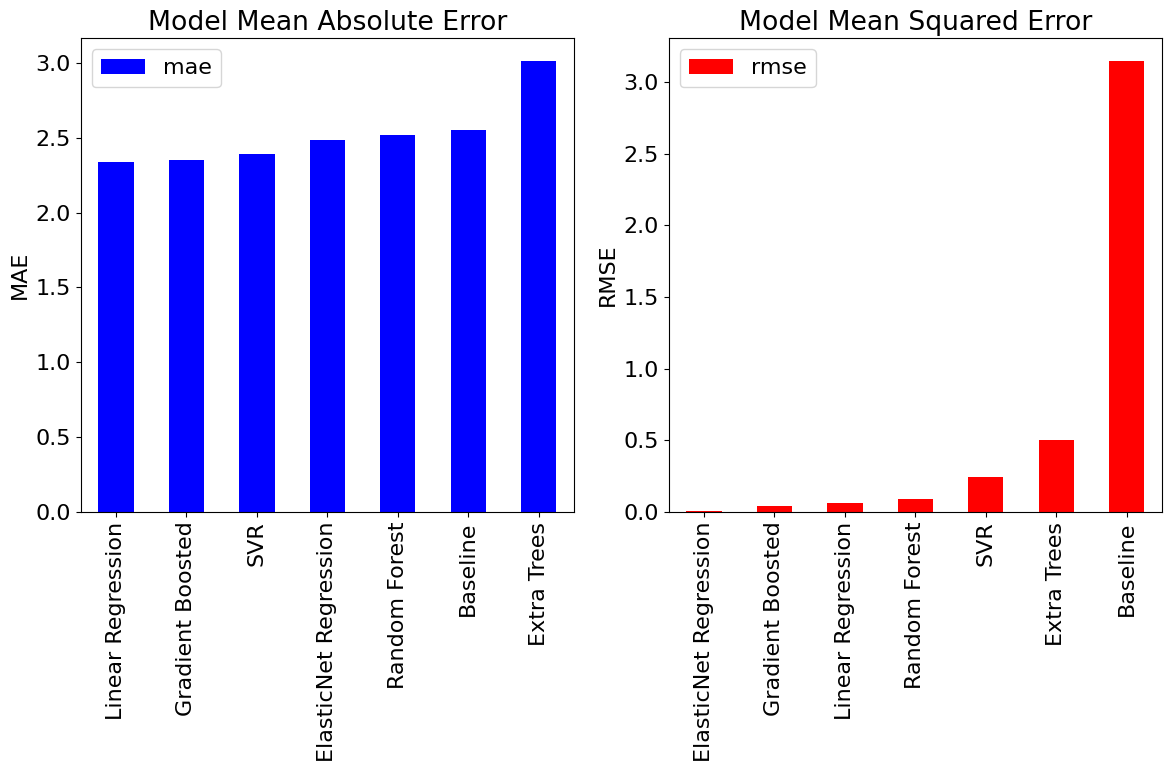

In [128]:
#Root mean squared error
ax = plt.subplot(1,2,1)
results.sort_values('mae',ascending=True).plot.bar(y='mae',color='b',ax=ax)
plt.title('Model Mean Absolute Error')
plt.ylabel('MAE')

#Median absolute percentage error
ax = plt.subplot(1,2,2)
results.sort_values('rmse',ascending=True).plot.bar(y='rmse',color='r',ax=ax)
plt.title('Model Mean Squared Error')
plt.ylabel('RMSE')

plt.tight_layout()

In [129]:
print('The Gradient Boosted regressor is {:0.2f}% better than the baseline.'.format(
(100 * abs(results.loc['Gradient Boosted','mae'] - results.loc['Baseline','mae'])) / results.loc['Baseline','mae']))

The Gradient Boosted regressor is 7.97% better than the baseline.


## Formula from Ordinary Least Sqaures Regression

In [130]:
lr = LinearRegression()
lr.fit(x_train.drop(columns='Grade'),y_train)

LinearRegression()

* **enumerate()** method adds a counter to an iterable and returns it in a form of enumerating object. This enumerated object can then be used directly for loops or converted into a list of tuples using the list() method.


* **enumerate(iterable, start=0)**
1. **Iterable**: any object that supports iteration.
2. **Start**: the index value from which the counter is to be started, by default it is 0.

In [132]:
ols_formula = 'Grade = %0.2f + ' % lr.intercept_
for i, col in enumerate(x_train.columns[1:]):
    ols_formula += ' %0.2f * %s +' %(lr.coef_[i],col)
    
' '.join(ols_formula.split(' ')[:-1])

'Grade = 10.72 +  -1.17 * failures + -0.16 * higher_edu + 0.36 * mother_edu + 0.31 * studytime + 0.03 * father_edu + -0.07 * absences'

## Implementing Bayesian Linear Regression

In [134]:
#Formula for bayesian linear regression (follows R formula syntax)
formula = 'Grade ~ ' + ' + '.join(['%s' % variable for variable in x_train.columns[1:]])
formula

'Grade ~ failures + higher_edu + mother_edu + studytime + father_edu + absences'

## Creating a model in PyMC3 and Sample from Posterior

* We now build the model using the formula defined above and a normal distribution for the data likelihood. Then, we let a Markov Chain Monte Carlo algorithm draw samples from the posterior to approximate the posterior for each of the model parameters.

* **pymc3.Model()** encapsulates the variables and likelihood factors of a model.

* **pymc3.glm.families().Normal()** - 


In [145]:
#Context for the model
with pm.Model() as normal_model:
    
    #The prior for the model parameters will be a normal distribution
    a = pm.glm.families.Normal()
    
    #Creating the model requires a formula and data(and optionally a family)
    pm.GLM.from_formula(formula,data=x_train,family=a)
    
    #Perform Markov Chain Rule Monte Carlo sampling
    normal_trace = pm.sample(draws=2000,chains=2,tune=500)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
C:\Users\binur\AppData\Roaming\Python\Python39\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\binur\AppData\Roaming\Python\Python39\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\binur\AppData\Roaming\Python\Python39\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sd, absence

Sampling 2 chains for 500 tune and 2_000 draw iterations (1_000 + 4_000 draws total) took 666 seconds.
The acceptance probability does not match the target. It is 0.889099601784737, but should be close to 0.8. Try to increase the number of tuning steps.


# Examine Bayesian Linear Regression Results

## Traceplot of all samples

* **pymc3.traceplot** plots the traceplots of the sampling process.

In [149]:
#Shows the trace with a vertical line at the mean of the trace
def plot_trace(trace):
    #Traceplot with vertical lines at the mean value
    ax = pm.traceplot(trace,figsize=(14,len(trace.varnames)*1.8),lines={k:v['mean'] for k,v in pm.summary(trace).iterrows()})
    matplotlib.rcParams['font.size'] = 16
    
    #Labels with the median value
    for i,mn in enumerate(pm.summary(trace)['mean']):
        ax[i,0].annotate('{:0.2f}'.format(mn),xy=(mn,0),xycoords='data',size=8,xytext=(-18,18),textcoords='offset points',
                         rotation=90,va='bottom',fontsize='large',color='red')

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\binur\AppData\Roaming\Python\Python39\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
C:\Users\binur\AppData\Local\Temp\ipykernel_4000\1716607868.py:4: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  ax = pm.traceplot(trace,figsize=(14,len(trace.varnames)*1.8),lines={k:v['mean'] for k,v in pm.summary(trace).iterrows()})
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\binur\AppData\Roaming\Python\Python39\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without

TypeError: Got both 'size' and 'fontsize', which are aliases of one another

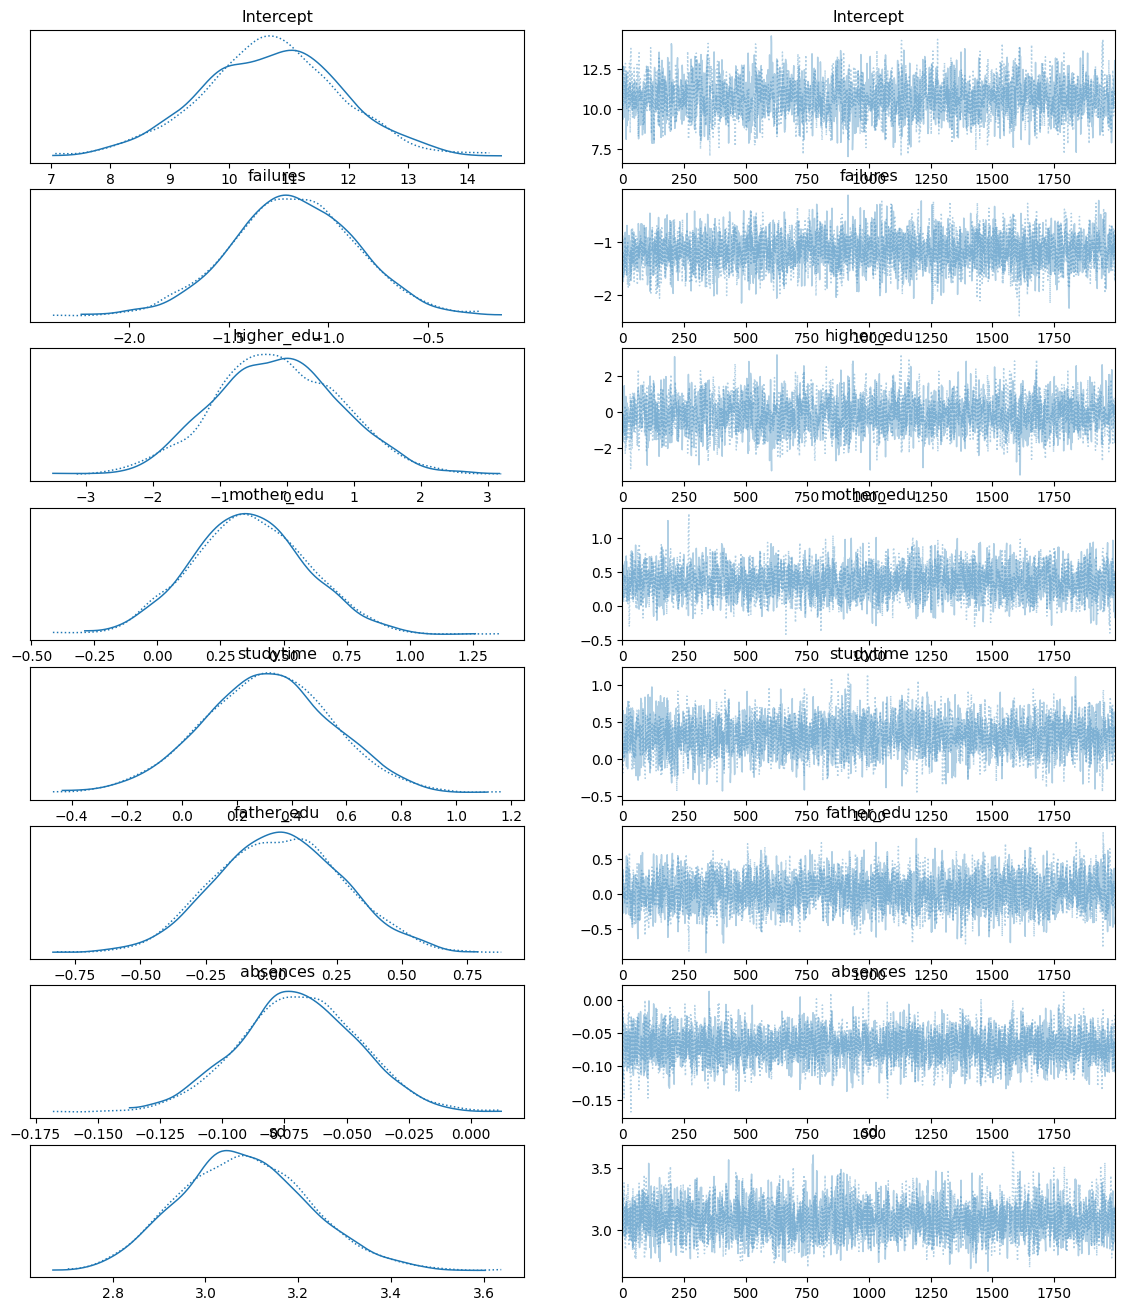

In [150]:
plot_trace(normal_trace)

C:\Users\binur\AppData\Local\Temp\ipykernel_4000\1168672415.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(normal_trace)
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\binur\AppData\Roaming\Python\Python39\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot: title={'center': 'Intercept'}>,
        <AxesSubplot: title={'center': 'Intercept'}>],
       [<AxesSubplot: title={'center': 'failures'}>,
        <AxesSubplot: title={'center': 'failures'}>],
       [<AxesSubplot: title={'center': 'higher_edu'}>,
        <AxesSubplot: title={'center': 'higher_edu'}>],
       [<AxesSubplot: title={'center': 'mother_edu'}>,
        <AxesSubplot: title={'center': 'mother_edu'}>],
       [<AxesSubplot: title={'center': 'studytime'}>,
        <AxesSubplot: title={'center': 'studytime'}>],
       [<AxesSubplot: title={'center': 'father_edu'}>,
        <AxesSubplot: title={'center': 'father_edu'}>],
       [<AxesSubplot: title={'center': 'absences'}>,
        <AxesSubplot: title={'center': 'absences'}>],
       [<AxesSubplot: title={'center': 'sd'}>,
        <AxesSubplot: title={'center': 'sd'}>]], dtype=object)

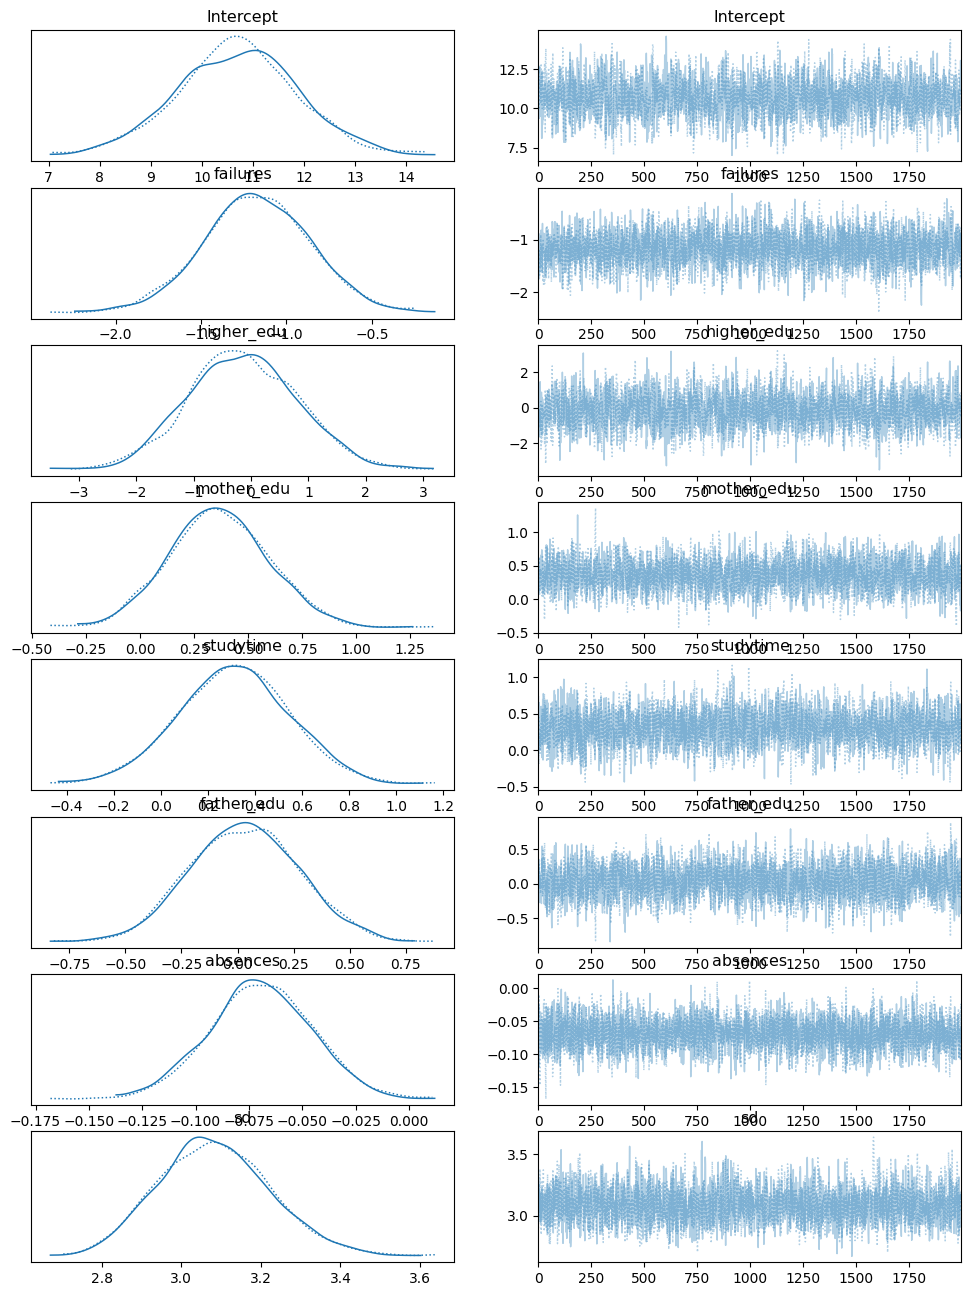

In [151]:
pm.traceplot(normal_trace)

* The left side of the traceplot is the marginal posterior: the values for the variable are on the x-axis with the probability for the variable (as determined by sampling) on the y-axis. The different colored lines indicate that we performed two chains of Markov Chain Monte Carlo. From the left side we can see that there is a range of values for each weight. The right side shows the different sample values drawn as the sampling process runs. Another method built into PyMC3 for examinig trace results is the **forestplot** which shows the distribution of each sampled parameter. This allows us to see the uncertainty in each sample. The forestplot is easily constructed from the trace using pm.forestplot.

C:\Users\binur\AppData\Local\Temp\ipykernel_4000\1268253099.py:1: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  pm.forestplot(normal_trace)
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\binur\AppData\Roaming\Python\Python39\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot: title={'center': '94.0% HDI'}>], dtype=object)

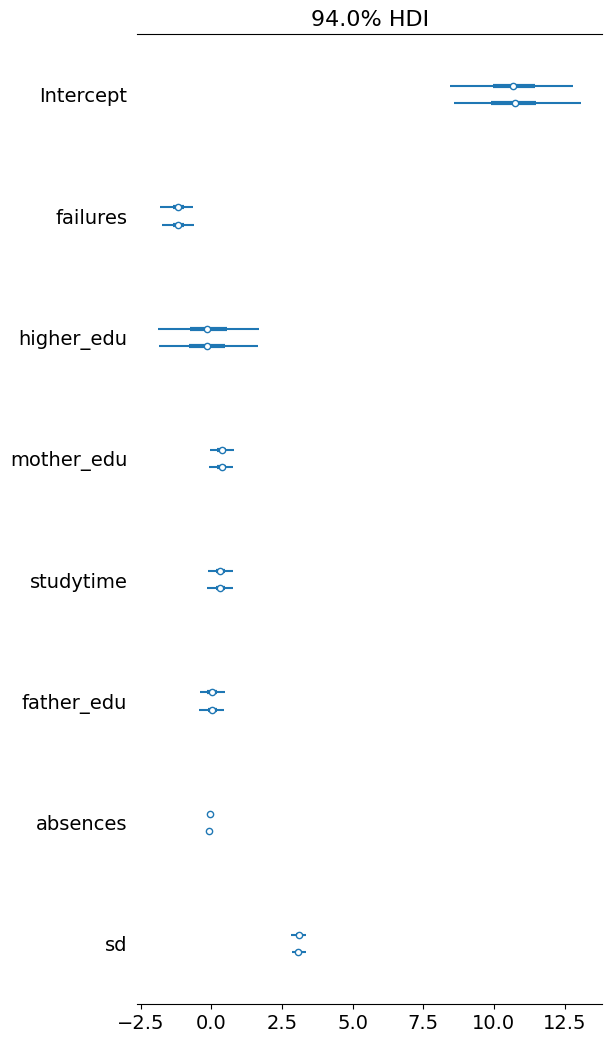

In [152]:
pm.forestplot(normal_trace)

* The left side of the traceplot is the marginal posterior: the values for the variable are on the x-axis with the probability for the variable (as determined by sampling) on the y-axis. The different colored lines indicate that we performed two chains of Markov Chain Monte Carlo. From the left side we can see that there is a range of values for each weight. The right side shows the different sample values drawn as the sampling process runs. Another method built into PyMC3 for examinig trace results is the forestplot which shows the distribution of each sampled parameter. This allows us to see the uncertainty in each sample. The forestplot is easily constructed from the trace using pm.forestplot.

Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot: title={'center': 'Intercept'}>,
        <AxesSubplot: title={'center': 'failures'}>,
        <AxesSubplot: title={'center': 'higher_edu'}>,
        <AxesSubplot: title={'center': 'mother_edu'}>],
       [<AxesSubplot: title={'center': 'studytime'}>,
        <AxesSubplot: title={'center': 'father_edu'}>,
        <AxesSubplot: title={'center': 'absences'}>,
        <AxesSubplot: title={'center': 'sd'}>]], dtype=object)

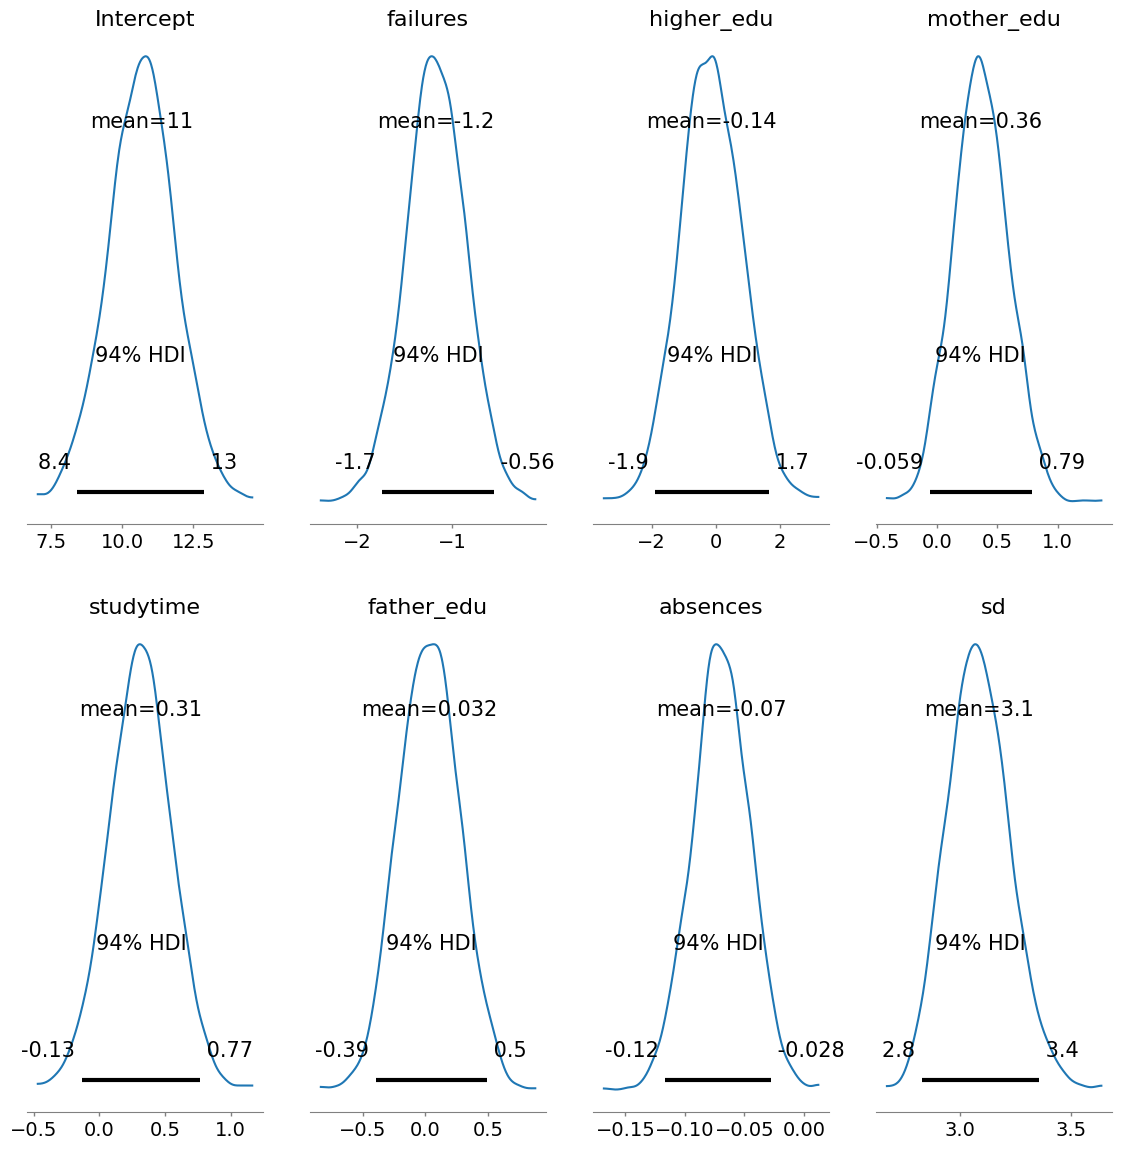

In [154]:
pm.plot_posterior(normal_trace,figsize=(14,14))

In [155]:
#Print out the mean variable weight from the trace
for variable in normal_trace.varnames:
    print('Variable:{:15} Mean weight in model: {:.4f}'.format(variable,np.mean(normal_trace[variable])))

Variable:Intercept       Mean weight in model: 10.6956
Variable:failures        Mean weight in model: -1.1737
Variable:higher_edu      Mean weight in model: -0.1368
Variable:mother_edu      Mean weight in model: 0.3649
Variable:studytime       Mean weight in model: 0.3104
Variable:father_edu      Mean weight in model: 0.0324
Variable:absences        Mean weight in model: -0.0696
Variable:sd_log__        Mean weight in model: 1.1256
Variable:sd              Mean weight in model: 3.0854


## Interpretation of weights

In [156]:
pm.summary(normal_trace)

Got error No model on context stack. trying to find log_likelihood in translation.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,10.696,1.172,8.427,12.869,0.025,0.018,2230.0,2301.0,1.0
failures,-1.174,0.312,-1.738,-0.563,0.005,0.004,3267.0,2955.0,1.0
higher_edu,-0.137,0.956,-1.884,1.650,0.020,0.016,2305.0,2601.0,1.0
mother_edu,0.365,0.227,-0.059,0.786,0.004,0.003,2860.0,2696.0,1.0
studytime,0.310,0.239,-0.133,0.769,0.004,0.003,3032.0,2147.0,1.0
father_edu,0.032,0.239,-0.395,0.497,0.004,0.004,2896.0,2744.0,1.0
absences,-0.070,0.024,-0.117,-0.028,0.000,0.000,3364.0,2453.0,1.0
sd,3.085,0.141,2.830,3.355,0.002,0.002,3536.0,2644.0,1.0


## Linear Formula from Bayesian Inference using Mean of Parameters

In [157]:
model_formula = 'Grade = '
for variable in normal_trace.varnames:
    model_formula += ' %0.2f * %s +' %(np.mean(normal_trace[variable]),variable)
    
' '.join(model_formula.split(' ')[:-1])

'Grade =  10.70 * Intercept + -1.17 * failures + -0.14 * higher_edu + 0.36 * mother_edu + 0.31 * studytime + 0.03 * father_edu + -0.07 * absences + 1.13 * sd_log__ + 3.09 * sd'